<a href="https://colab.research.google.com/github/aceslima/python_api_scraping/blob/master/Dados_do_Yahoo_Finance_com_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install yfinance

     |████████████████████████████████| 6.4 MB 17.5 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


**Obtendo dados de mercado do Yahoo Finance API**

In [3]:
import pandas as pd
import yfinance as yf

Informações sobre uma empresa:

In [4]:
# Exemplo: ITUB4.SA (Itaú)
df = yf.Ticker('ITUB4.SA')

Neste exemplo, temos o setor da empresa, preço atual e o volume médio negociado nas últimos 10 dias:

In [10]:
print("Setor: {}".format(df.get_info()['sector']))
print("Preço atual: {}".format(df.get_info()['currentPrice']))
print("Volume médio: {}".format(df.get_info()['averageVolume10days']))

Setor: Financial Services
Preço atual: 26.18
Volume médio: 27216344


In [11]:
# Lista de informações disponíveis
list(df.get_info().keys())[:10]

['zip',
 'sector',
 'fullTimeEmployees',
 'longBusinessSummary',
 'city',
 'phone',
 'state',
 'country',
 'companyOfficers',
 'website']

A partir do objeto retornado podemos obter o histórico de preços:

In [13]:
# Histórico de preços
df_hist = df.history(period='max')

In [14]:
df_hist.head(3)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-12-21,1.744812,1.852041,1.744607,1.834700,74224,0.0,0.0
2000-12-22,1.816230,1.816230,1.744402,1.755176,23312,0.0,0.0
2000-12-25,1.755176,1.755176,1.755176,1.755176,0,0.0,0.0


Visualização da evolução do preço de fechamento do ativo desde o ínicio dos dados:

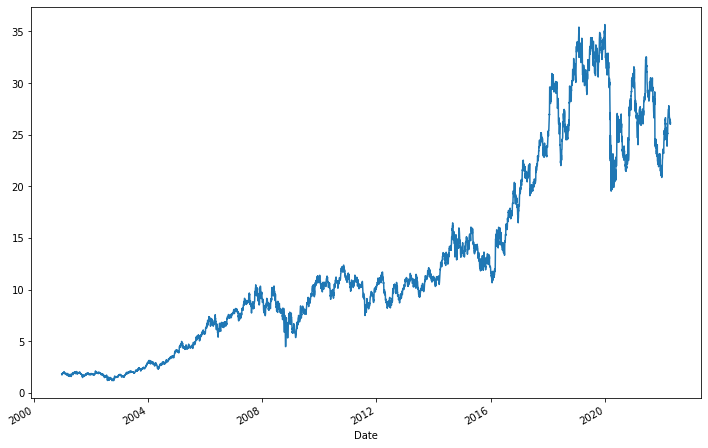

In [15]:
df_hist.Close.plot(figsize=(12,8));

Se quisermos apenas o histórico de preços de um ou mais ativos podemos chamar a função "download" passando a lista de tickers dos ativos.

In [17]:
# Retornando apenas o historico de preços
itau = yf.download('ITUB4.SA')

[*********************100%***********************]  1 of 1 completed


In [18]:

itau.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-12-21,2.815505,2.988535,2.815174,2.960552,1.834701,74224
2000-12-22,2.930748,2.930748,2.814843,2.832229,1.755175,23312
2000-12-25,2.832229,2.832229,2.832229,2.832229,1.755175,0


Se nenhum período de tempo for especificado será retornado todo o histórico do ativo, mas caso queira um período específico podemos usar os parâmetros "start" para data inicial e "end" para data final

In [19]:
# A partir de 2010
dados = yf.download('ITUB4.SA', start='2010-01-01')

[*********************100%***********************]  1 of 1 completed


In [20]:
dados.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,17.708261,18.436810,17.708261,18.268333,11.321169,11843397
2010-01-05,18.313868,18.386723,18.168158,18.386723,11.394534,8593315
2010-01-06,18.327526,18.436810,18.077089,18.227352,11.295757,10602572
2010-01-07,18.099855,18.236460,18.008787,18.040663,11.180069,9966567
2010-01-08,18.113516,18.113516,17.721922,17.767456,11.010767,9748709


In [21]:
# Histórico de várias ações
dados = yf.download('ITUB4.SA BBDC4.SA BCSA34.SA BBAS3.SA BIDI11.SA', start='2010-01-01')

[*********************100%***********************]  5 of 5 completed


Para cada ativo será retornado as seguintes informações: 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'

Assim, nosso DataFrame possui dois níveis conforme a amostra abaixo:

In [22]:
dados.head(2)

Adj Close                                             Close  \
             BBAS3.SA  BBDC4.SA BCSA34.SA BIDI11.SA   ITUB4.SA BBAS3.SA   
Date                                                                      
2010-01-04  13.521725  8.167879       NaN       NaN  11.321168     29.9   
2010-01-05  13.386060  8.127675       NaN       NaN  11.394532     29.6   

                                                      ...       Open  \
             BBDC4.SA BCSA34.SA BIDI11.SA   ITUB4.SA  ...   BBAS3.SA   
Date                                                  ...              
2010-01-04  13.379374       NaN       NaN  18.268333  ...  29.799999   
2010-01-05  13.308395       NaN       NaN  18.386723  ...  30.100000   

                                                         Volume              \
             BBDC4.SA BCSA34.SA BIDI11.SA   ITUB4.SA   BBAS3.SA    BBDC4.SA   
Date                                                                          
2010-01-04  13.077717       NaN       NaN  17.708261  3624700.0  10148480.0   
2010-01-05  13.450352       NaN       NaN  18.313868  3064900.0  11964815.0   

                                            
           BCSA34.SA BIDI11.SA    ITUB4.SA  
Date                                        
2010-01-04       NaN       NaN  11843397.0  
2010-01-05       NaN       NaN   8593315.0  

[2 rows x 30 columns]

In [23]:
dados.columns.levels[0]

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [24]:
dados.columns.levels[1]

Index(['BBAS3.SA', 'BBDC4.SA', 'BCSA34.SA', 'BIDI11.SA', 'ITUB4.SA'], dtype='object')

Selecionando apenas o preço de fechamento de cada ativo:

In [25]:
precos = dados['Close']

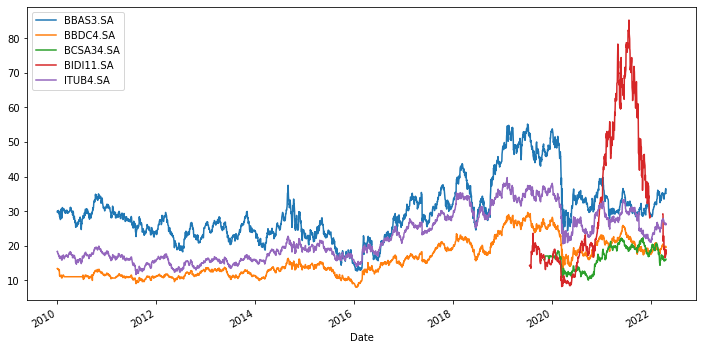

In [27]:
precos.plot(figsize=(12,6))

In [28]:
# Normalização dos precos (z-score)
precos_norm = (precos - precos.mean())/precos.std()

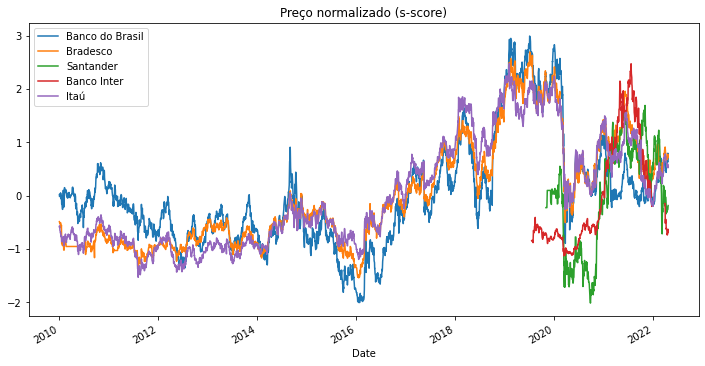

In [30]:
ax = precos_norm.plot(figsize=(12, 6), title='Preço normalizado (s-score)')
ax.legend(['Banco do Brasil', 'Bradesco', 'Santander', 'Banco Inter', 'Itaú']);

In [31]:
# Retorno acumulado
precos_rtn = precos[['BBAS3.SA', 'BBDC4.SA']].pct_change()

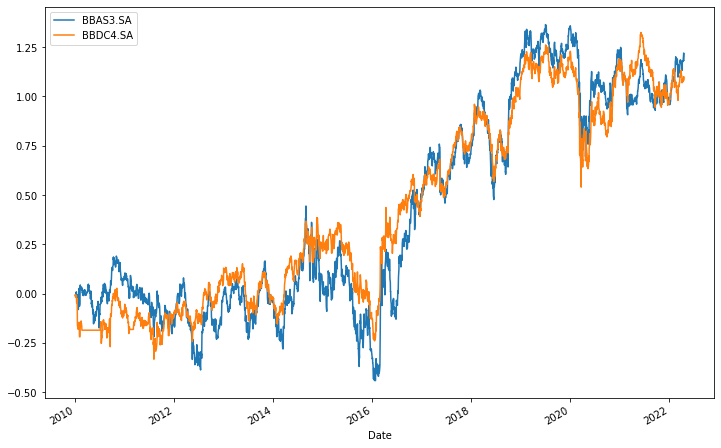

In [32]:
precos_rtn.cumsum().plot(figsize=(12,8))